In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io


uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df.head()

Saving issues.csv to issues (4).csv


,name,year,quarter,count
0,Ruby,2011,3,965
1,JavaScript,2011,3,694
2,Python,2011,3,619
3,PHP,2011,3,560
4,Java,2011,3,420


In [ ]:
# Data Types
df.dtypes

name       object
year        int64
quarter     int64
count       int64
dtype: object

In [ ]:
# Missing Values
df.replace("?", np.nan, inplace = True)
print("Missing class: ", df['count'].isnull().sum())
print("Missing value column name: ", df['name'].isnull().sum())
print("Missing value column year: ", df['year'].isnull().sum())

Missing class:  0
Missing value column name:  0
Missing value column year:  0


In [ ]:
# Basic Statistic
print ("Basic Statistic")
display(df.describe(include='all').T)

Basic Statistic


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,3375,178,JavaScript,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,3375.0,NaN,NaN,NaN,2016.833481,2.574464,2011.0,2015.0,2017.0,2019.0,2022.0
quarter,3375.0,NaN,NaN,NaN,2.510222,1.119345,1.0,2.0,3.0,4.0,4.0
count,3375.0,NaN,NaN,NaN,9210.374815,28680.099075,100.0,222.5,567.0,2989.5,341480.0


In [ ]:
# Duplicate Value
duplicate = df[df.duplicated()]

if (duplicate.shape[0] != 0):
    print("Duplicate Rows :")
    duplicate
else:
    print("No duplicate value")

No duplicate value


In [ ]:
proglang_to_predict = str(input('Input programming language you want to predict: '))
df_filtered = df[df['name'] == proglang_to_predict]
display(df_filtered)

Input programming language you want to predict: Java


,name,year,quarter,count
4,Java,2011,3,420
13,Java,2011,4,1808
31,Java,2012,1,4429
52,Java,2012,2,13462
91,Java,2012,3,14231
130,Java,2012,4,17209
166,Java,2013,1,37298
217,Java,2013,2,32265
266,Java,2013,3,35624
321,Java,2013,4,41646


# Regresi Linear

In [ ]:
from sklearn.linear_model import LinearRegression

X = df_filtered[['year']]
Y = df_filtered['count']

lm = LinearRegression()
lm.fit(X,Y)
print('Full Dataset: ',df_filtered.shape)
print('Training data: ',X.shape)
print('Coeficient: ',lm.coef_)
print('Intercept: ',lm.intercept_)

Full Dataset:  (43, 4)
Training data:  (43, 1)
Coeficient:  [5005.72666371]
Intercept:  -10011173.363968555


<Axes: xlabel='year', ylabel='count'>

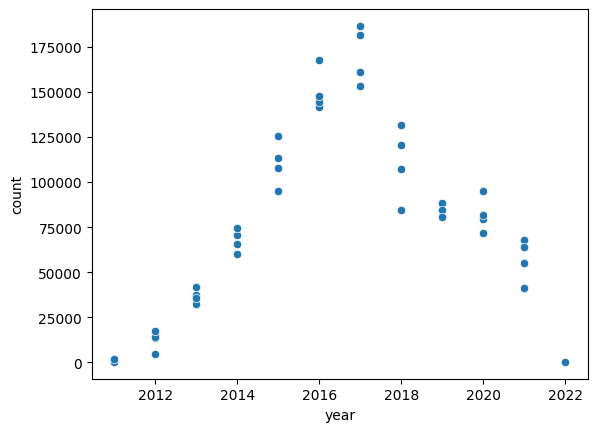

In [ ]:
import seaborn as sns
sns.scatterplot(data=df_filtered, x="year", y="count")

(0.0, 195876.05)

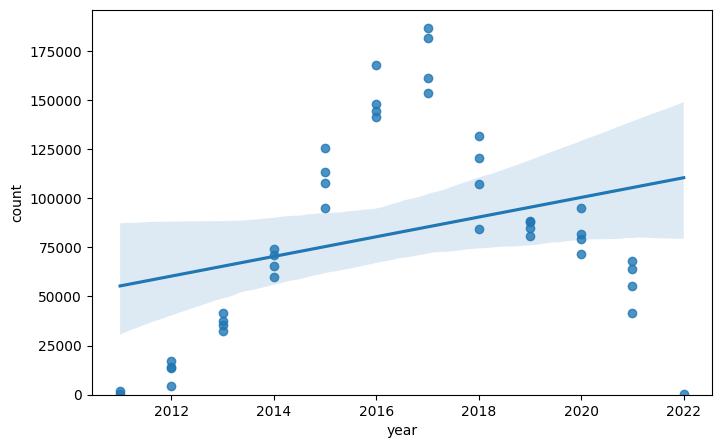

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(x="year", y="count", data=df_filtered)
plt.ylim(0,)

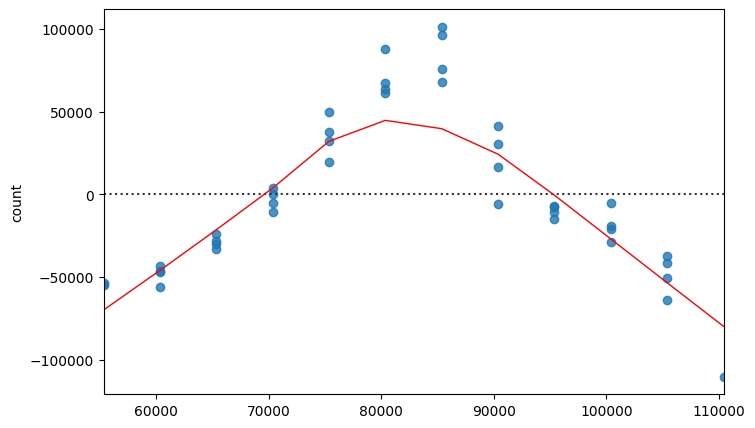

In [ ]:
residuals = df_filtered['count'] - lm.predict(X)

plt.figure(figsize=(8,5))
sns.residplot(x=lm.predict(X), y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.show()

<ipython-input-151-34ec4c7deac4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df_filtered['count'], hist=False, color="r", label="Actual Value")
<ipython-input-151-34ec4c7deac4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitt

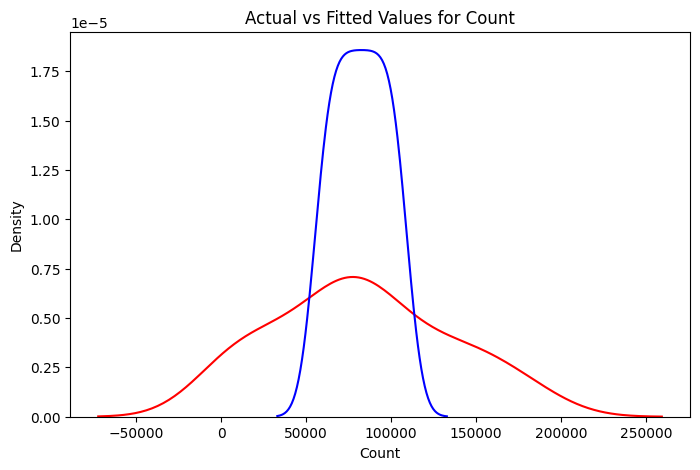

In [ ]:
Y_hat = lm.predict(X)

plt.figure(figsize=(8,5))
ax1 = sns.distplot(df_filtered['count'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Count')
plt.xlabel('Count')
plt.ylabel('Density')

plt.show()
plt.close()

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(df_filtered[['year']])
test_y = np.asanyarray(df_filtered[['count']])
test_y_ = lm.predict(df_filtered[['year']])

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 43402.33
Residual sum of squares (MSE): 2832626256.50
R2-score: -8.57


# Polynomial Regression

In [ ]:
X = df_filtered['year']
Y = df_filtered['count']

f = np.polyfit(X, Y, 4)
p = np.poly1d(f)
print(p)

       4             3             2
172.6 x - 1.393e+06 x + 4.213e+09 x - 5.664e+12 x + 2.856e+15


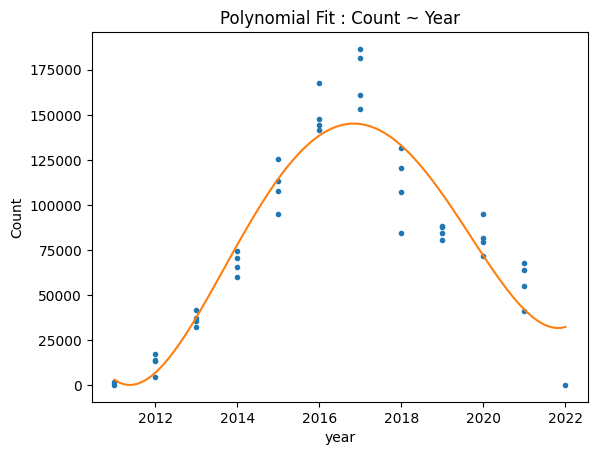

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(2011, 2022, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit : Count ~ Year')
    ax = plt.gca()
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Count')

    plt.show()
    plt.close()

PlotPolly(p, X, Y, 'year')

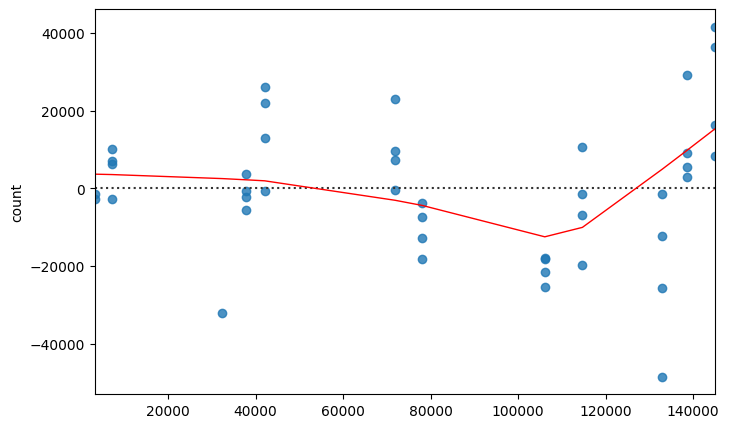

In [ ]:
predictions = p(X).flatten()
residuals = df_filtered['count'] - predictions

plt.figure(figsize=(8,5))
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.show()

<ipython-input-156-390f46b08cd2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df_filtered['count'], hist=False, color="r", label="Actual Value")
<ipython-input-156-390f46b08cd2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p(X), hist=False, color="b", label="Fitte

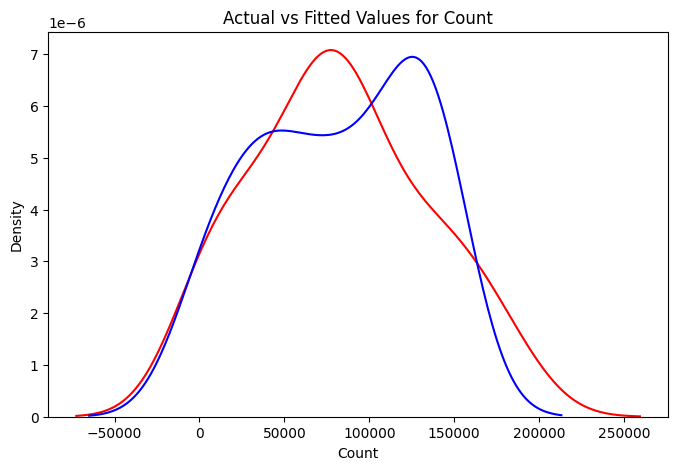

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.distplot(df_filtered['count'], hist=False, color="r", label="Actual Value")
sns.distplot(p(X), hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Count')
plt.xlabel('Count')
plt.ylabel('Density')

plt.show()
plt.close()

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(X)
test_y = np.asanyarray(Y)
test_y_ = p(X)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 13446.88
Residual sum of squares (MSE): 319116538.09
R2-score: 0.86


# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df_filtered[['year']]
y = df_filtered['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data train, data test size
print("Data train size: ", y_train.shape[0])
print("Data test size: ", y_test.shape[0])

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest Regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train_scaled, y_train)

# Make predictions
predictions_rf = model_rf.predict(X_test_scaled)


Data train size:  34
Data test size:  9


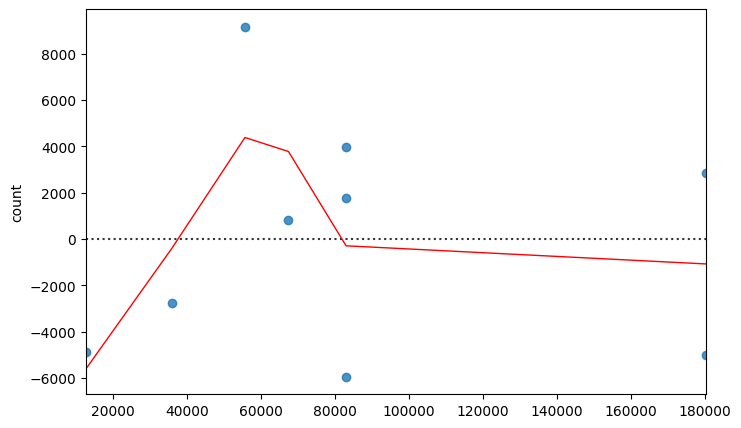

In [ ]:
residuals = y_test - predictions_rf

plt.figure(figsize=(8,5))
sns.residplot(x=predictions_rf, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.show()

<ipython-input-160-c050390d8cd5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df_filtered['count'], hist=False, color="r", label="Actual Value")
<ipython-input-160-c050390d8cd5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions_rf, hist=False, color="b", la

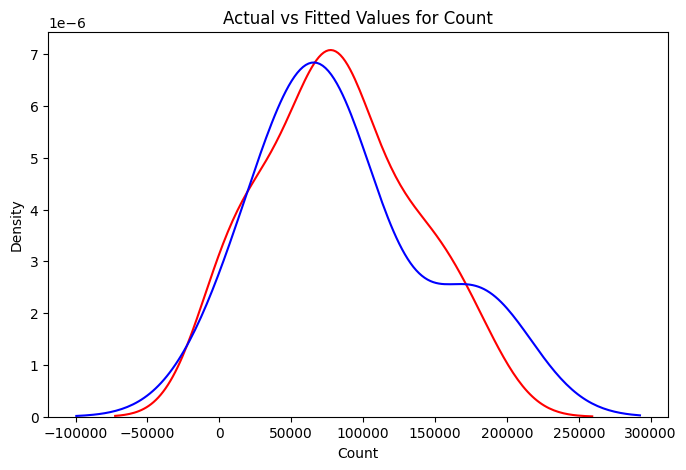

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.distplot(df_filtered['count'], hist=False, color="r", label="Actual Value")
sns.distplot(predictions_rf, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Count')
plt.xlabel('Count')
plt.ylabel('Density')

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mean_absolute_error = mean_absolute_error(predictions_rf, y_test)
print("Mean absolute error: %.2f" % mean_absolute_error)

mse = mean_squared_error(predictions_rf, y_test)
print("Residual sum of squares (MSE): %.2f" % mse)

r2score = r2_score(predictions_rf, y_test)
print("R2-score: %.2f" % r2score)


Mean absolute error: 8308.94
Residual sum of squares (MSE): 145715097.49
R2-score: 0.95
